In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = {
    "Employee_ID": range(1, 11),
    "Department": ["IT", "HR", "IT", "Sales", "Sales", "HR", "IT", "Sales", "HR", "IT"],
    "Salary": [35000, 38000, 40000, 42000, 45000, 48000, 50000, 52000, 600000, 750000]
}

df = pd.DataFrame(data)
df

,Employee_ID,Department,Salary
0,1,IT,35000
1,2,HR,38000
2,3,IT,40000
3,4,Sales,42000
4,5,Sales,45000
5,6,HR,48000
6,7,IT,50000
7,8,Sales,52000
8,9,HR,600000
9,10,IT,750000


In [3]:
df.head()

,Employee_ID,Department,Salary
0,1,IT,35000
1,2,HR,38000
2,3,IT,40000
3,4,Sales,42000
4,5,Sales,45000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Employee_ID  10 non-null     int64 
 1   Department   10 non-null     object
 2   Salary       10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [7]:
df.describe()

,Employee_ID,Salary
count,10.00000,10.000000
mean,5.50000,170000.000000
std,3.02765,268548.774796
min,1.00000,35000.000000
25%,3.25000,40500.000000
50%,5.50000,46500.000000
75%,7.75000,51500.000000
max,10.00000,750000.000000


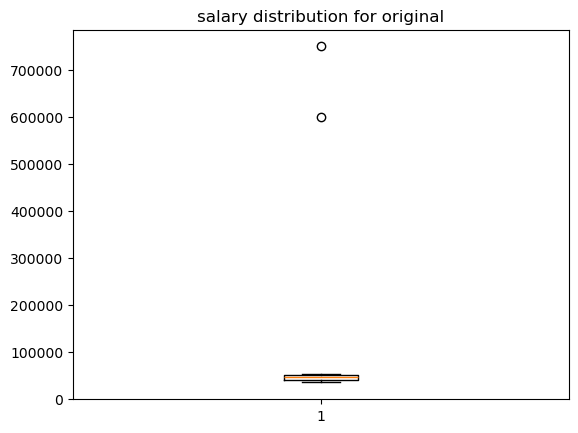

In [8]:
plt.boxplot(df['Salary'])
plt.title('salary distribution for original')
plt.show()

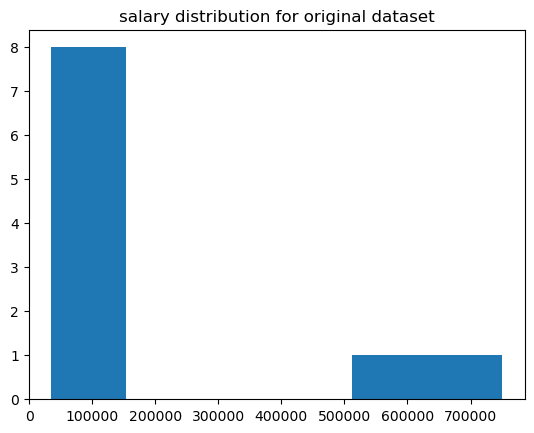

In [14]:
plt.hist(df['Salary'], bins = 6)
plt.title('salary distribution for original dataset')
plt.show()

In [19]:
# convert the salary column from daatframe to an array

new_salary = df['Salary'].values
new_salary

array([ 35000,  38000,  40000,  42000,  45000,  48000,  50000,  52000,
       600000, 750000])

In [23]:
# get the interquartile range

q1 = np.percentile(new_salary, 25)
q1

np.float64(40500.0)

In [24]:
q3 = np.percentile(new_salary, 75)
q3

np.float64(51500.0)

In [25]:
# interquartile range

iqr = q3 - q1
iqr

np.float64(11000.0)

In [26]:
lower = q1 - 1.5 * iqr
lower

np.float64(24000.0)

In [27]:
upper = q3 + 1.5 * iqr
upper

np.float64(68000.0)

In [28]:
# outlier

outlier = df[(new_salary < lower) | (new_salary > upper)]
outlier

,Employee_ID,Department,Salary
8,9,HR,600000
9,10,IT,750000


In [30]:
# winsorization of the outliers

winsorized_salary = np.where(new_salary > upper, upper,
                            np.where(new_salary < lower, lower, new_salary))

winsorized_salary

array([35000., 38000., 40000., 42000., 45000., 48000., 50000., 52000.,
       68000., 68000.])

In [31]:
# add the winsorised salary to the dataframe

df['wins_salary'] = winsorized_salary
df

,Employee_ID,Department,Salary,wins_salary
0,1,IT,35000,35000.0
1,2,HR,38000,38000.0
2,3,IT,40000,40000.0
3,4,Sales,42000,42000.0
4,5,Sales,45000,45000.0
5,6,HR,48000,48000.0
6,7,IT,50000,50000.0
7,8,Sales,52000,52000.0
8,9,HR,600000,68000.0
9,10,IT,750000,68000.0


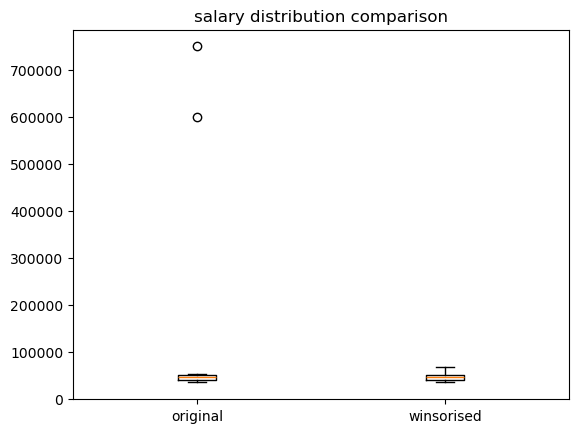

In [32]:
plt.boxplot([df['Salary'], df['wins_salary']])
plt.xticks([1,2], ['original', 'winsorised'])
plt.title('salary distribution comparison')
plt.show()

In [33]:
df[['Salary', 'wins_salary']].describe()

,Salary,wins_salary
count,10.000000,10.000000
mean,170000.000000,48600.000000
std,268548.774796,11520.030864
min,35000.000000,35000.000000
25%,40500.000000,40500.000000
50%,46500.000000,46500.000000
75%,51500.000000,51500.000000
max,750000.000000,68000.000000


# mini project on EDA

In [34]:
data = {
    "Customer_ID": range(1, 13),
    "Age": [23, 25, np.nan, 30, 35, 40, 29, np.nan, 50, 60, 45, 28],
    "Annual_Spend": [500, 700, 650, 800, 900, 1200, 750, 820, 15000, 18000, 1100, 780]
}

dfl = pd.DataFrame(data)
dfl

,Customer_ID,Age,Annual_Spend
0,1,23.0,500
1,2,25.0,700
2,3,NaN,650
3,4,30.0,800
4,5,35.0,900
5,6,40.0,1200
6,7,29.0,750
7,8,NaN,820
8,9,50.0,15000
9,10,60.0,18000


In [35]:
dfl.head()

,Customer_ID,Age,Annual_Spend
0,1,23.0,500
1,2,25.0,700
2,3,NaN,650
3,4,30.0,800
4,5,35.0,900


In [36]:
dfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Customer_ID   12 non-null     int64  
 1   Age           10 non-null     float64
 2   Annual_Spend  12 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 420.0 bytes


In [37]:
dfl.isnull().sum()

Customer_ID     0
Age             2
Annual_Spend    0
dtype: int64

In [38]:
dfl.describe()

,Customer_ID,Age,Annual_Spend
count,12.000000,10.000000,12.000000
mean,6.500000,36.500000,3433.333333
std,3.605551,12.048513,6139.680675
min,1.000000,23.000000,500.000000
25%,3.750000,28.250000,737.500000
50%,6.500000,32.500000,810.000000
75%,9.250000,43.750000,1125.000000
max,12.000000,60.000000,18000.000000


In [39]:
dfl.median()

Customer_ID       6.5
Age              32.5
Annual_Spend    810.0
dtype: float64

In [43]:
# fill null values using median

dfl['Age'] = dfl['Age'].fillna(dfl['Age'].median())
dfl

,Customer_ID,Age,Annual_Spend
0,1,23.0,500
1,2,25.0,700
2,3,32.5,650
3,4,30.0,800
4,5,35.0,900
5,6,40.0,1200
6,7,29.0,750
7,8,32.5,820
8,9,50.0,15000
9,10,60.0,18000


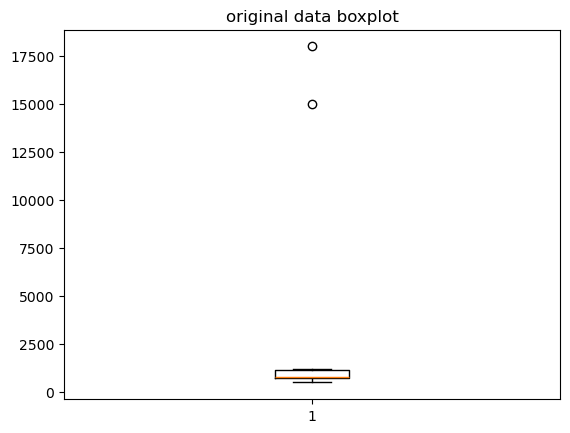

In [45]:
# check for outlier using boxplot

plt.boxplot(dfl['Annual_Spend'])
plt.title('original data boxplot')
plt.show()

In [49]:
spend = dfl['Annual_Spend'].values
spend

array([  500,   700,   650,   800,   900,  1200,   750,   820, 15000,
       18000,  1100,   780])

In [50]:
# claculate iqr and get the outlier

q1 = np.percentile(spend, 25)
q3 =np.percentile(spend, 75)

iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

In [51]:
outlier = dfl[(spend < lower) | (spend > upper)]
outlier

,Customer_ID,Age,Annual_Spend
8,9,50.0,15000
9,10,60.0,18000


In [53]:
# introduce winsorizayion

winsorized_spend = np.where(spend > upper, upper, 
                           np.where(spend < lower, lower, spend))
winsorized_spend

array([ 500.  ,  700.  ,  650.  ,  800.  ,  900.  , 1200.  ,  750.  ,
        820.  , 1706.25, 1706.25, 1100.  ,  780.  ])

In [54]:
dfl['wins_spend'] = winsorized_spend
dfl

,Customer_ID,Age,Annual_Spend,wins_spend
0,1,23.0,500,500.00
1,2,25.0,700,700.00
2,3,32.5,650,650.00
3,4,30.0,800,800.00
4,5,35.0,900,900.00
5,6,40.0,1200,1200.00
6,7,29.0,750,750.00
7,8,32.5,820,820.00
8,9,50.0,15000,1706.25
9,10,60.0,18000,1706.25


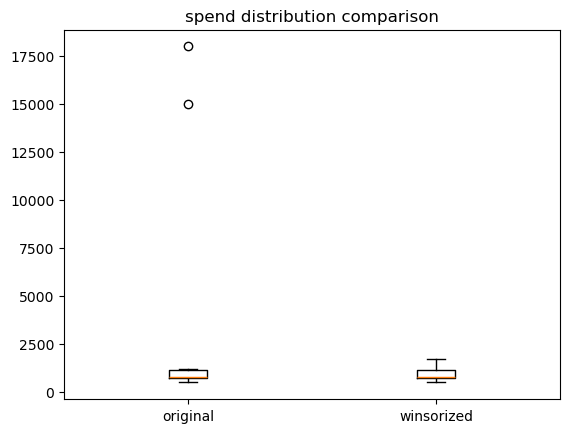

In [59]:
# boxplot to compare

plt.boxplot([dfl['Annual_Spend'], dfl['wins_spend']])
plt.xticks([1, 2], ['original', 'winsorized'])
plt.title('spend distribution comparison')
plt.show()

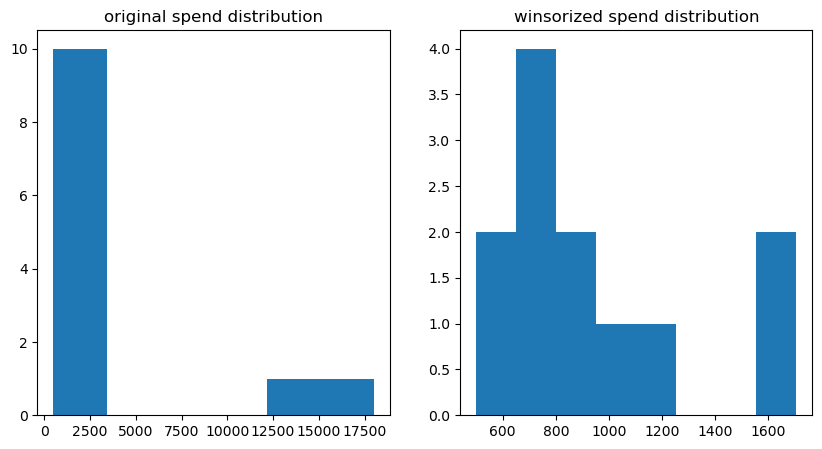

In [62]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[0].hist(dfl['Annual_Spend'], bins = 6)
ax[0].set_title('original spend distribution')

ax[1].hist(dfl['wins_spend'], bins = 8)
ax[1].set_title('winsorized spend distribution')

plt.show()